# Customer Churn Analysis for a Telecommunication Company

## Introduction

 ## 1.1 Business Understanding


### Description 

The goal of this project is to develop a machine learning model to predict customer churn for a telecommunications company. Churn refers to customers who stop using the company’s services. By identifying factors that influence churn, the company can develop strategies to retain customers, thus increasing revenue and profitability.

### Objective:

- Understand the data and identify key factors that affect customer churn.
- Build and evaluate a classification model to predict churn.
- Provide actionable insights to the company to reduce churn rates.



### Hypothesis Statements

- **Null Hypothesis (H0):** There is no significant relationship between the type of internet service (DSL, Fiber Optic, No) and customer churn.
- **Alternative Hypothesis (H1):** There is a significant relationship between the type of internet service (DSL, Fiber Optic, No) and customer churn.
has context menu

### Analytical Question

1. **What are the demographic characteristics of customers who are more likely to churn?**
   - I will explore the relationship between demographic variables (gender, senior citizen status, partnership status, dependents) and churn. For instance, are senior citizens more likely to churn than younger customers? Do customers with dependents churn at a different rate compared to those without?
 
2. **How does the tenure of a customer relate to their likelihood of churning?**
   - By analyzing the tenure column, I will determine if customers who have been with the company longer are more or less likely to churn. This analysis could reveal critical points in the customer lifecycle where churn is more likely, enabling targeted retention efforts.
 
3. **What role do service-related factors (e.g., internet service, tech support) play in customer churn?**
   - I will understand how the type and quality of services provided (internet service, online security, online backup, device protection, tech support, streaming services) impact churn. For example, does having multiple services reduce the likelihood of churn?
 
4. **How do different contract types and payment methods affect customer churn?**
   - I will examine the relationship between contract terms (month-to-month, one-year, two-year contracts), payment methods (electronic check, mailed check, bank transfer, credit card), and churn to provide insights into which contract types and payment methods are more stable.
 
5. **What is the relationship between monthly charges and total charges with customer churn?**
   - By analyzing the monthly charges and total charges, I will determine if higher or lower charges correlate with churn. This could indicate if pricing strategies need to be adjusted to retain customers.

## 2. Data Understanding

In this section,I will import important libraries and datasets and also perform EDA to understand the data better. This includes visualizing the distribution of variables, identifying patterns, and discovering anomalies.

**Importations**

In [1]:
# Importing Library packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')


In [2]:
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, log_loss 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBClassifier

import json
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from IPython.display import display, HTML
from sklearn.utils import estimator_html_repr



from sklearn.experimental import enable_halving_search_cv  # This enables HalvingGridSearchCV
from sklearn.model_selection import HalvingGridSearchCV

#### Load Datasets 

In [3]:
# Database connection setup

from dotenv import dotenv_values

import pyodbc
            

#### First data


In [4]:
# load environment variables from .env file into a dictionary
environment_variables  = dotenv_values(".env")

# Get the values for the credentials from .env file
server=environment_variables.get("server_name")
database=environment_variables.get("database_name")
username=environment_variables.get("user")
password=environment_variables.get("password")

# create a connection string
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

connection = pyodbc.connect(connection_string)

# Call DataFrame to understand DataFrame details for 2020
query=  "SELECT * FROM dbo.LP2_Telco_churn_first_3000"
data_1 =pd.read_sql(query, connection)

data_1.head()
            

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


#### Second data

In [5]:
# Correct file path format
file_path = r"C:\Users\HP\OneDrive\Desktop\LP2\Customer-Churn-Analysis-for-a-Telecommunication-Company\Data\LP2_Telco-churn-second-2000 (1).csv"

#Read the Excel file
data_second = pd.read_csv(file_path)

#Display the first few rows of the dataframe
data_second.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


#### Third data

In [6]:
# Correct file path format
file_path = r"C:\Users\HP\OneDrive\Desktop\LP2\Customer-Churn-Analysis-for-a-Telecommunication-Company\Data\Telco-churn-last-2000.csv"

#Read the Excel file
data_test = pd.read_csv(file_path)

#Display the first few rows of the dataframe
data_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [7]:
# Merge datasets using the standardized column names
merged_data = pd.concat([data_1, data_second], ignore_index=True)

merged_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


## 3: Data Preparation

In [8]:
# Initial data overview
merged_data.head()
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


#### colunms quality check

In [9]:
merged_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [10]:
import missingno as msno

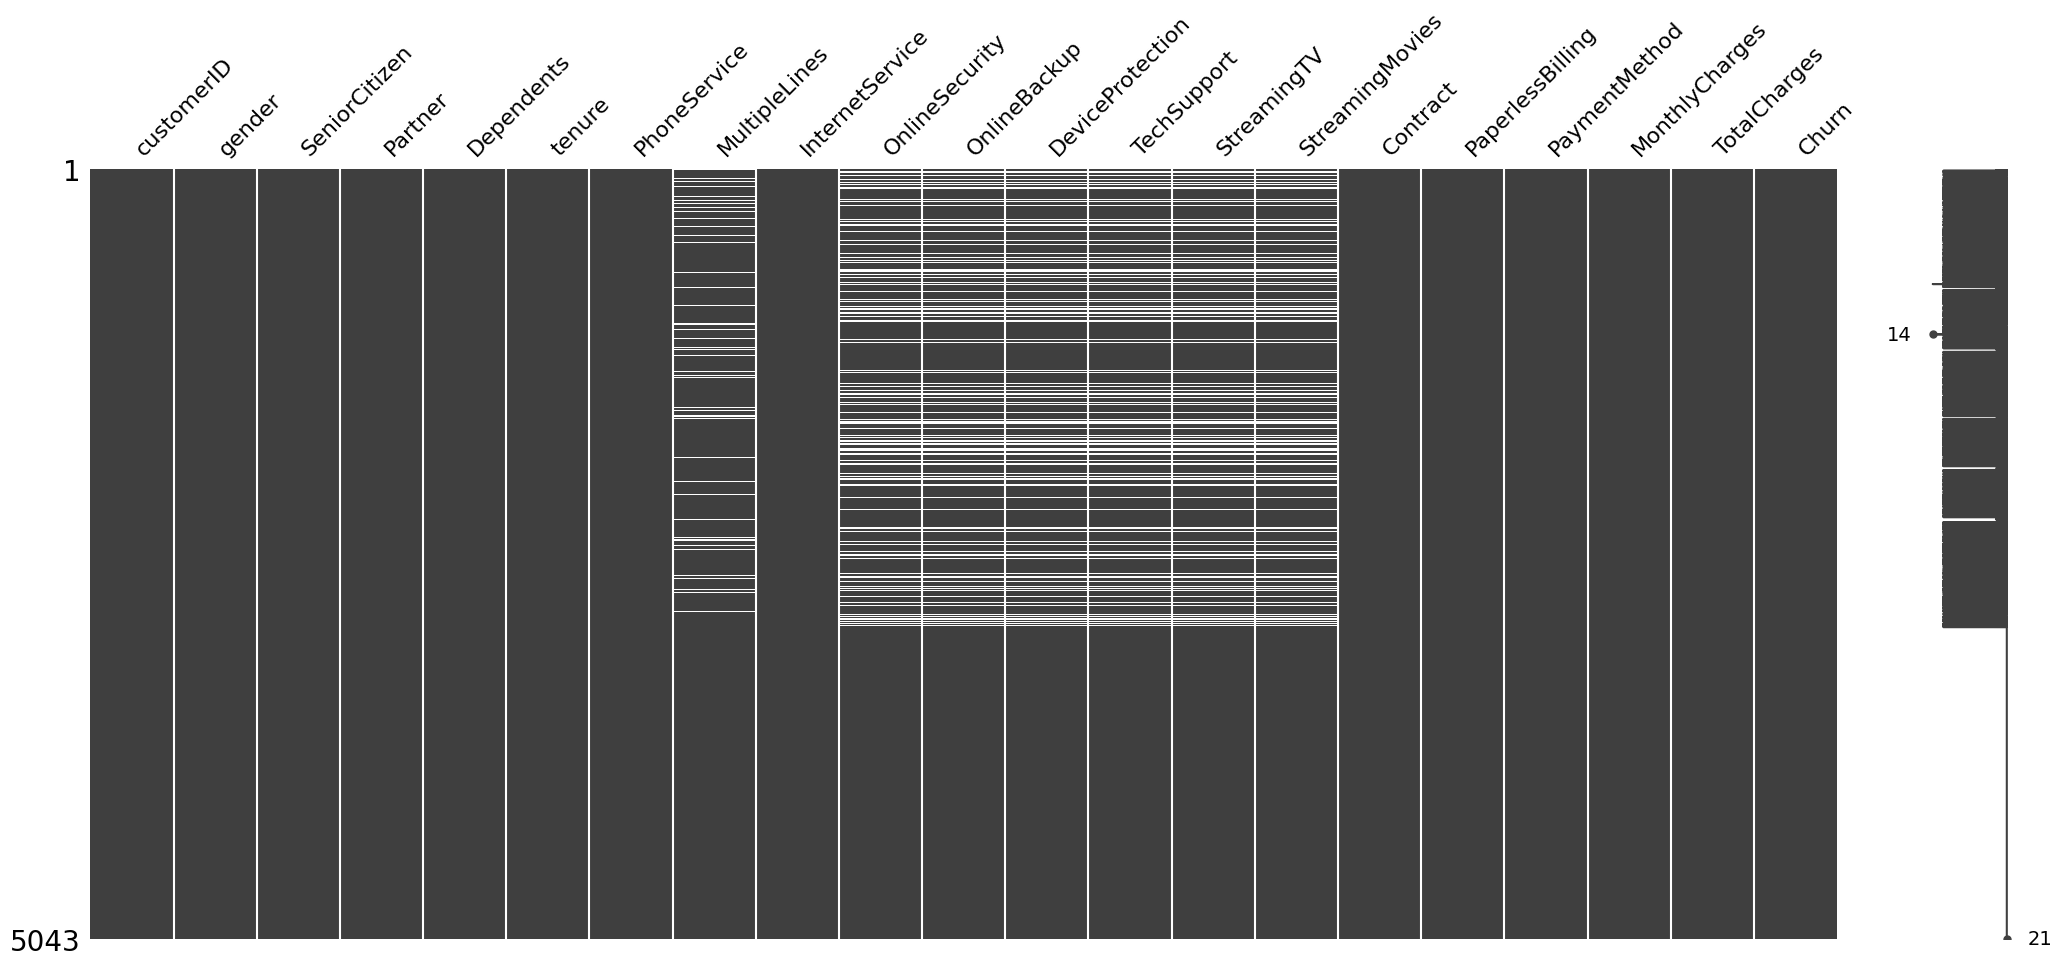

In [11]:
# Check for missing values
msno.matrix(merged_data)
plt.show()

In [12]:
# Imputing with the mode for categorical columns
categorical_columns = merged_data.select_dtypes(
    include=['object', 'bool']).columns
for column in categorical_columns:
    if merged_data[column].isnull().any():
        mode_value = merged_data[column].mode()[0]
        merged_data[column].fillna(mode_value, inplace=True)

In [13]:
#changing dtypes for seniorcitizen and total charges
merged_data['SeniorCitizen'] = merged_data['SeniorCitizen'].astype(object)
merged_data['TotalCharges'] = pd.to_numeric(merged_data['TotalCharges'], errors='coerce')

In [14]:
# Filling missing values with the mean value of the column
mean_total_charges = merged_data['TotalCharges'].mean()
merged_data['TotalCharges'].fillna(mean_total_charges, inplace=True)



In [15]:
merged_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
# check for duplicates

merged_data.duplicated().sum()

np.int64(0)

In [17]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.000000,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775,70.550003,90.050003,118.650002
TotalCharges,5043.0,2299.799108,2268.819487,18.799999,416.650,1400.849976,3857.575073,8670.100000


In [18]:
# checking for discriptive statistics for categorical colunms

merged_data.describe(include='object').T

,count,unique,top,freq
customerID,5043,5043,3186-AJIEK,1
gender,5043,2,Male,2559
SeniorCitizen,5043,2,0,4224
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,5043,5,False,1706
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,5043,5,False,2129
OnlineBackup,5043,5,False,1971


In [19]:
#check for unique values

for column in merged_data.columns:
    #check whether the column is not a numerical column
    if(merged_data[column].dtype not in['int64','float64']):
        #print out the unique values in categorical columns
        print(f'column: {column}\nunique values: {merged_data[column].unique()}')
        print(70 * '-')

column: customerID
unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------
column: gender
unique values: ['Female' 'Male']
----------------------------------------------------------------------
column: SeniorCitizen
unique values: [0 1]
----------------------------------------------------------------------
column: Partner
unique values: [True False 'No' 'Yes']
----------------------------------------------------------------------
column: Dependents
unique values: [False True 'No' 'Yes']
----------------------------------------------------------------------
column: PhoneService
unique values: [False True 'Yes' 'No']
----------------------------------------------------------------------
column: MultipleLines
unique values: [False True 'No' 'No phone service' 'Yes']
----------------------------------------------------------------------
column: InternetService
unique values: [

In [20]:
# Unifying the values
bool_columns = ['Partner', 'Dependents', 'PhoneService', 'Churn', 'MultipleLines',
                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                      'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
for col in bool_columns:
    merged_data[col] = merged_data[col].map({True:'Yes', False: 'No'}).fillna('No')

In [21]:
#check for unique values to see if there is a change

for column in merged_data.columns:
    #check whether the column is not a numerical column
    if(merged_data[column].dtype not in['int64','float64']):
        #print out the unique values in categorical columns
        print(f'column: {column}\nunique values: {merged_data[column].unique()}')
        print(70 * '-')

column: customerID
unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------
column: gender
unique values: ['Female' 'Male']
----------------------------------------------------------------------
column: SeniorCitizen
unique values: [0 1]
----------------------------------------------------------------------
column: Partner
unique values: ['Yes' 'No']
----------------------------------------------------------------------
column: Dependents
unique values: ['No' 'Yes']
----------------------------------------------------------------------
column: PhoneService
unique values: ['No' 'Yes']
----------------------------------------------------------------------
column: MultipleLines
unique values: ['No' 'Yes']
----------------------------------------------------------------------
column: InternetService
unique values: ['DSL' 'Fiber optic' 'No']
-------------------------------------

### Univariate Analysis

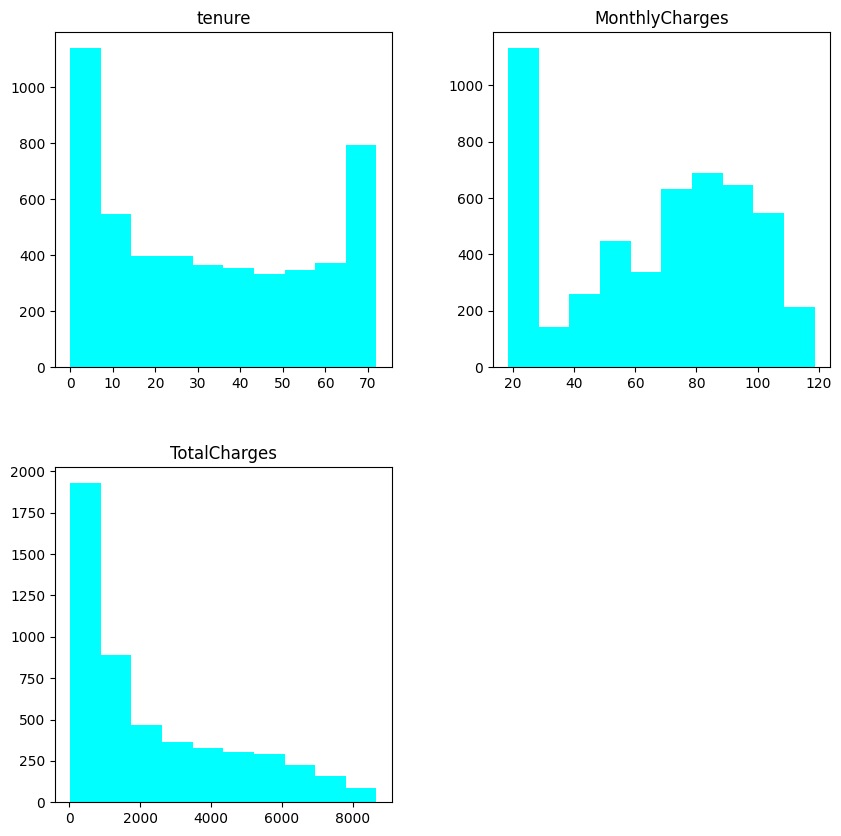

In [57]:
merged_data.hist(figsize=(10,10),grid=False,color="cyan")
plt.show()

- From the above , the dataset is not evenly distributed.
- There are no duplicates found in the dataset.


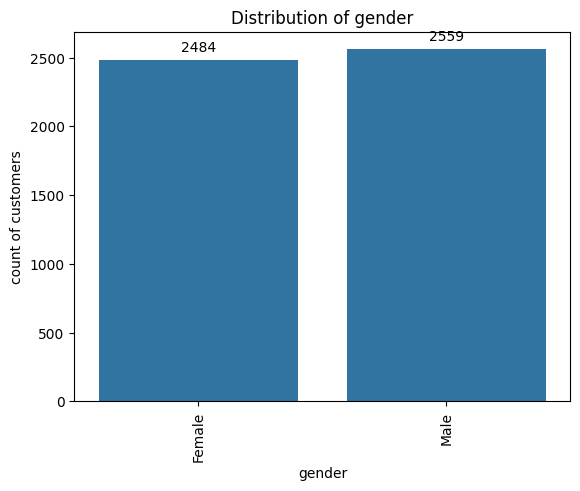

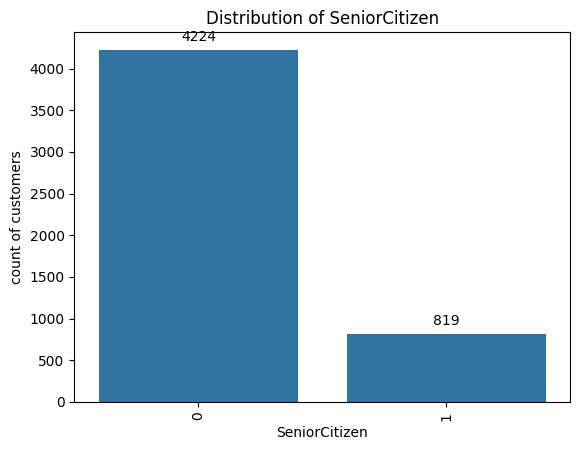

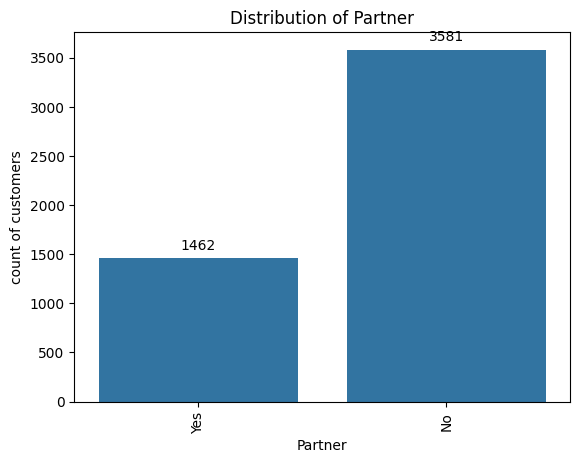

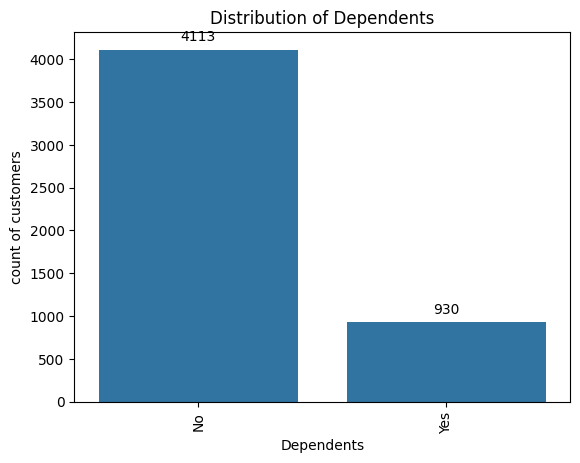

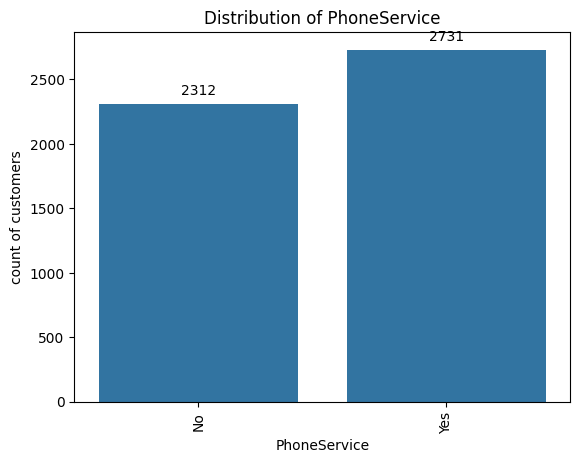

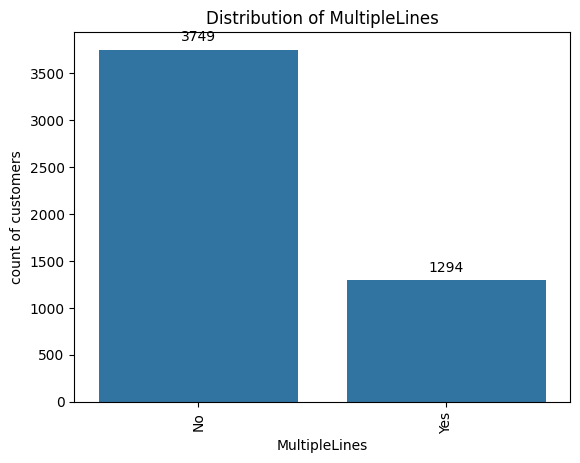

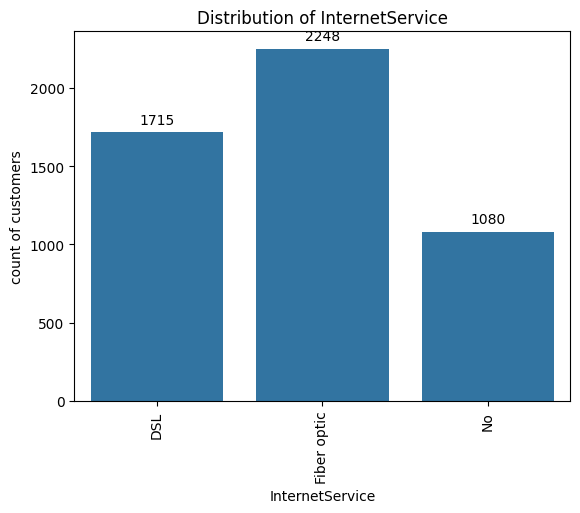

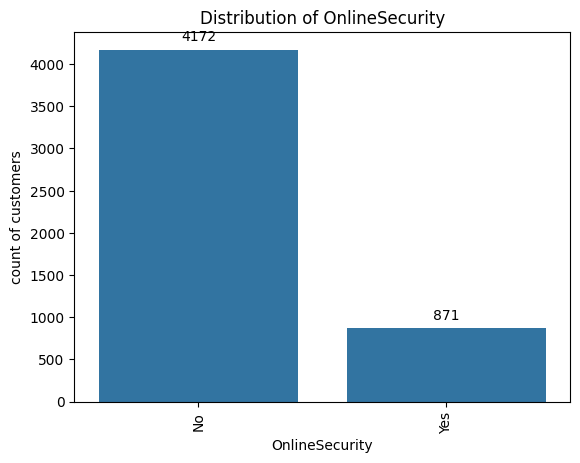

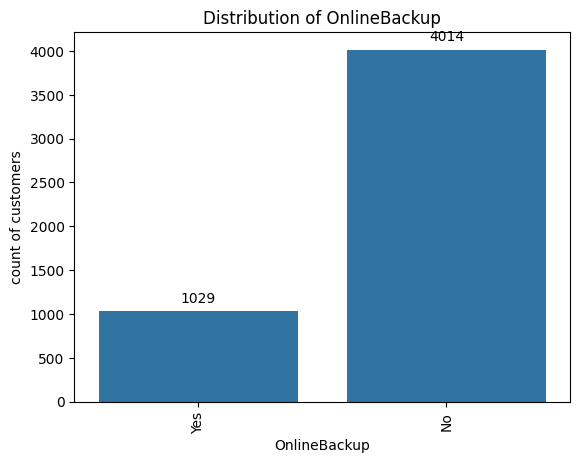

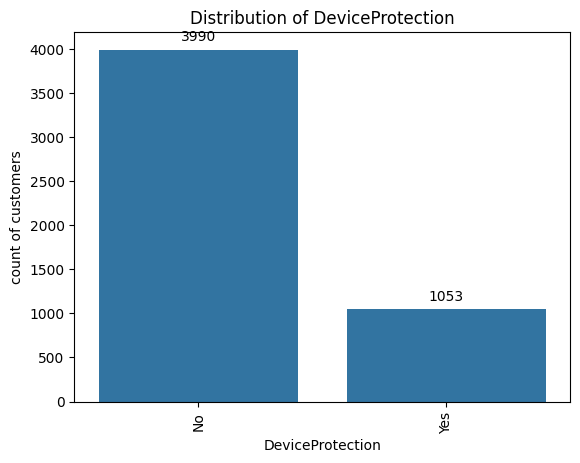

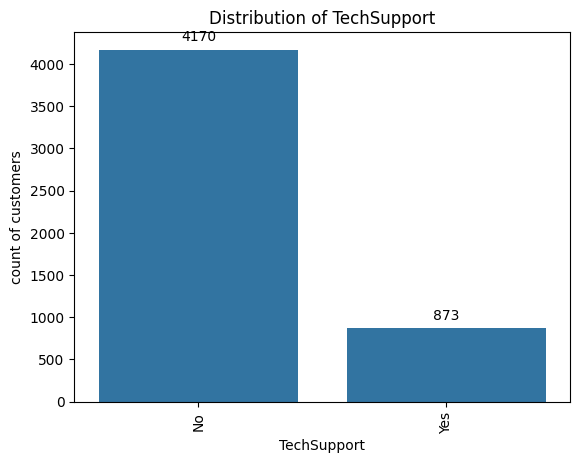

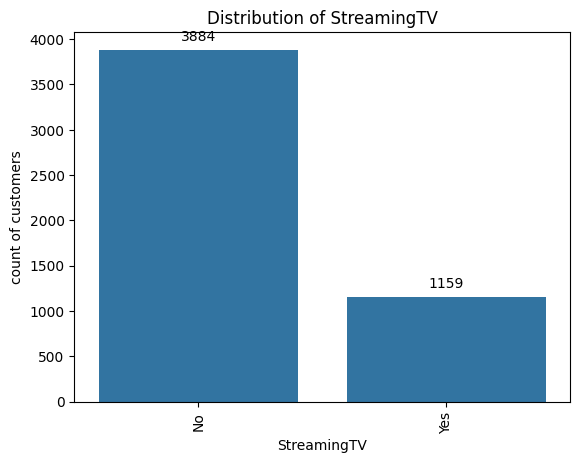

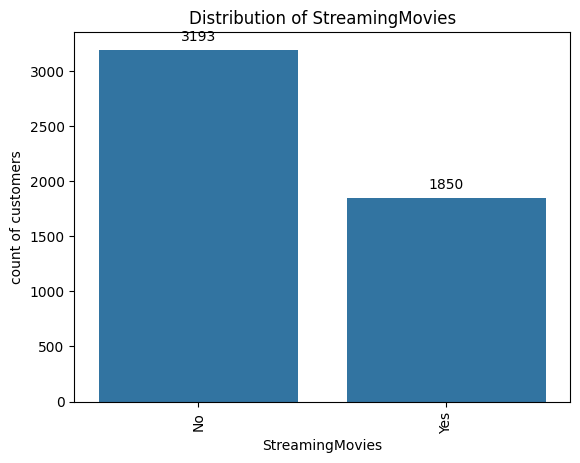

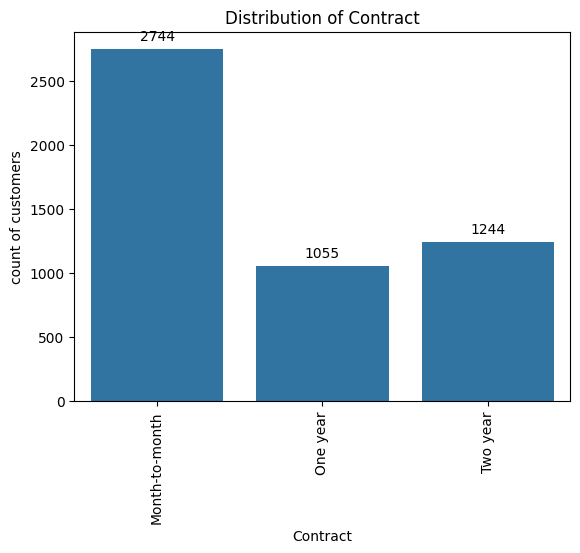

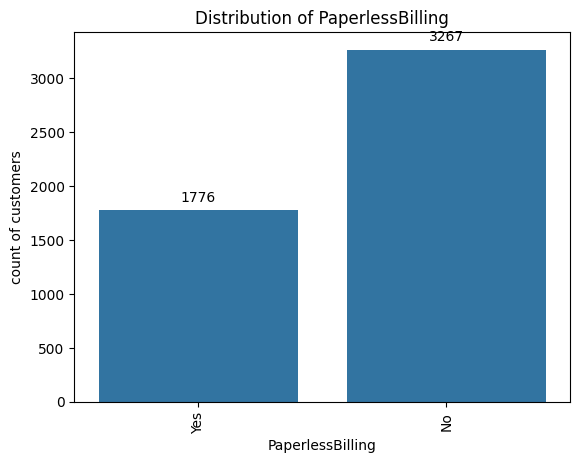

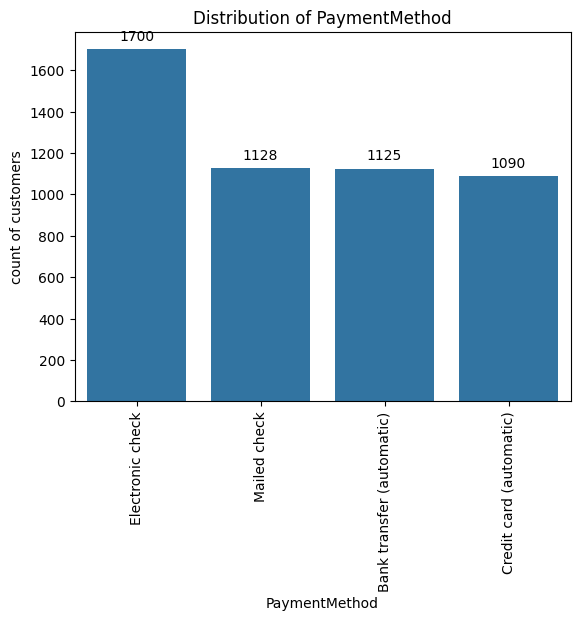

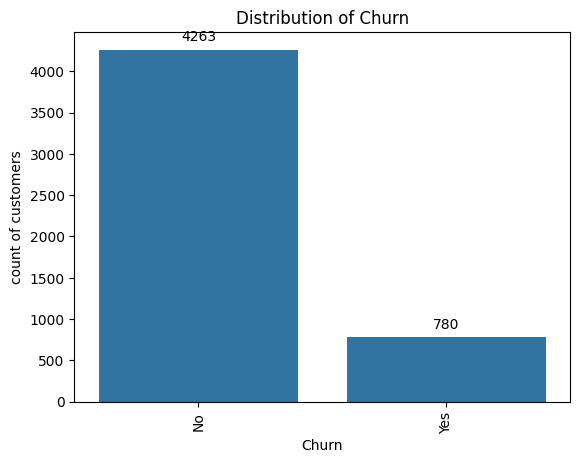

In [23]:
# Distribution of the categorical columns
for i, predictor in enumerate(merged_data.drop(columns=['TotalCharges', 'MonthlyCharges', 'customerID', 'tenure'])):
    plt.figure(i)
    plot=sns.countplot(data=merged_data, x=predictor)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {predictor}')
    plt.xlabel(f'{predictor}')
    plt.ylabel('count of customers')
    # Annotate the bars with the actual counts
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
    plt.show()


- From the above diagram, the gender does not affect churning, since both gender are evenly distributed.
- There is more senior citizens of 4224 than junior citizens of about 819.
- Fibre optic seems to be the most internet service used.


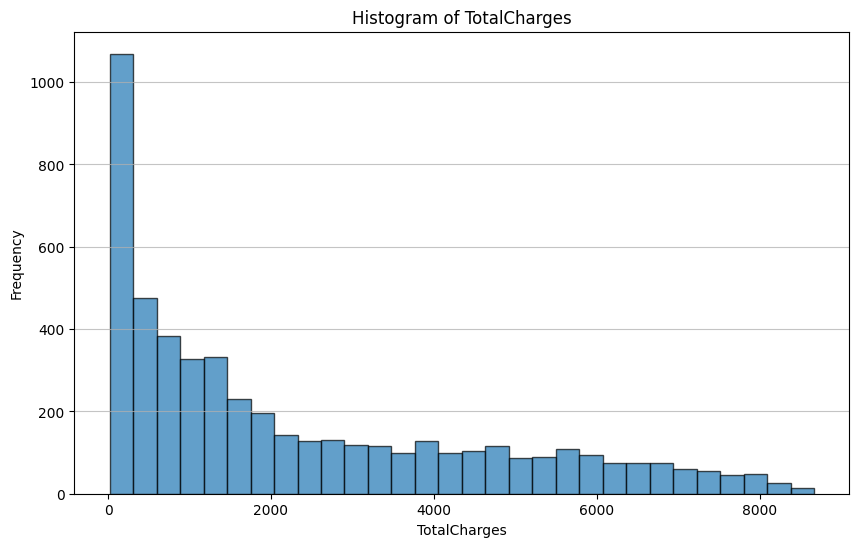

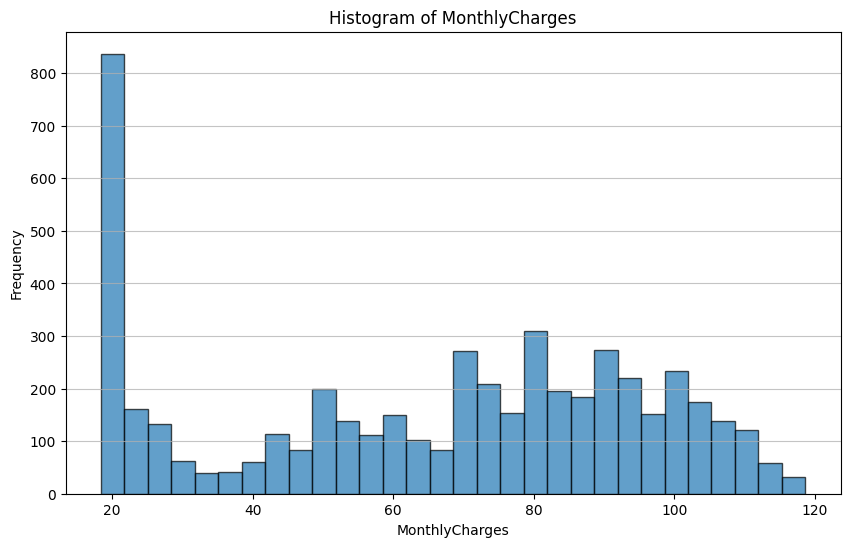

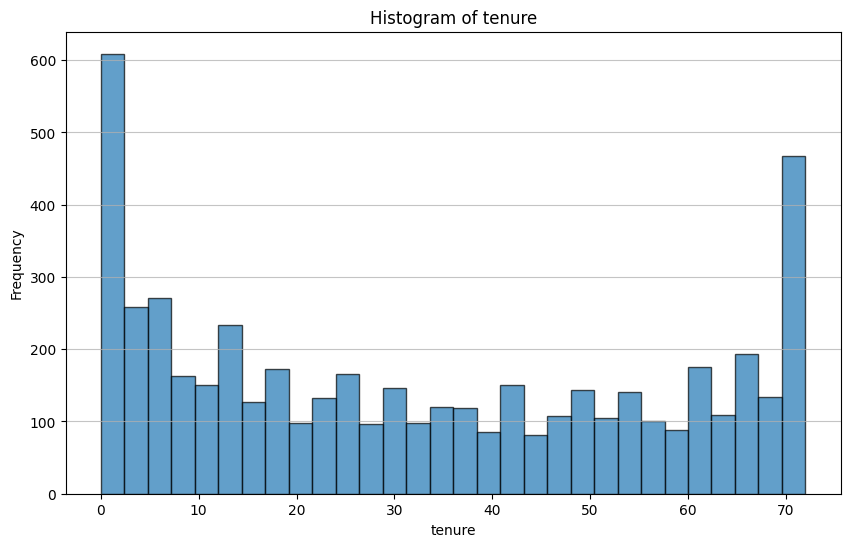

In [24]:
# Distribution of the numerical columns
for column in ['TotalCharges', 'MonthlyCharges', 'tenure']:
    plt.figure(figsize=(10,6))
    plt.hist(merged_data[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

- For the monthly charges, they are most likely to affect churning at the first month but significantly reduce in the following months.
- The spread of monthly charges shows that while many customers contribute a small amount each month, there are also a significant number of customers who pay more, contributing to higher overall revenue..
- Most customers have low total charges, which could suggest a large number of new customers or customers on lower plans.
The small number of customers with high total charges might be the long-term or high-value customers.
 

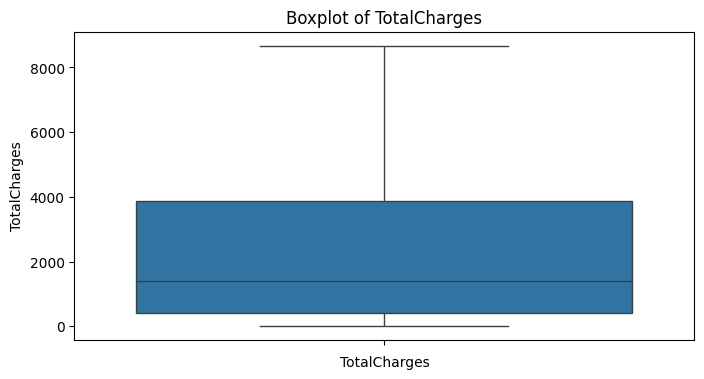

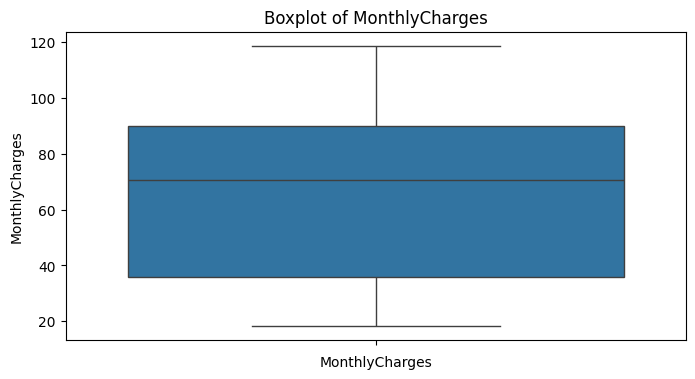

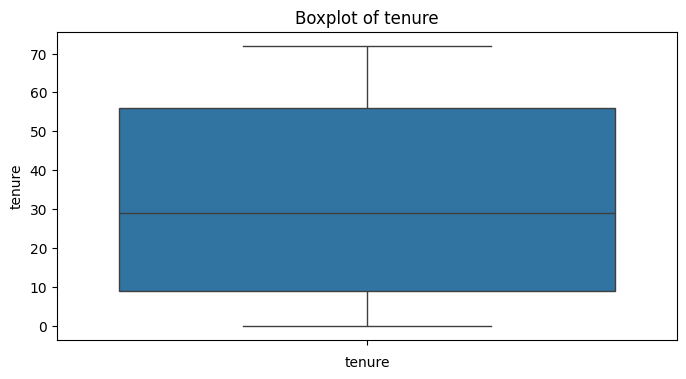

In [25]:
# boxplot of the numerical columns
for column in ['TotalCharges', 'MonthlyCharges', 'tenure']:
    plt.figure(figsize=(8,4))
    sns.boxplot(merged_data[column].dropna())
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

- The numerical colums do not have outliers.


## Bivariate and Multivariate Analysis

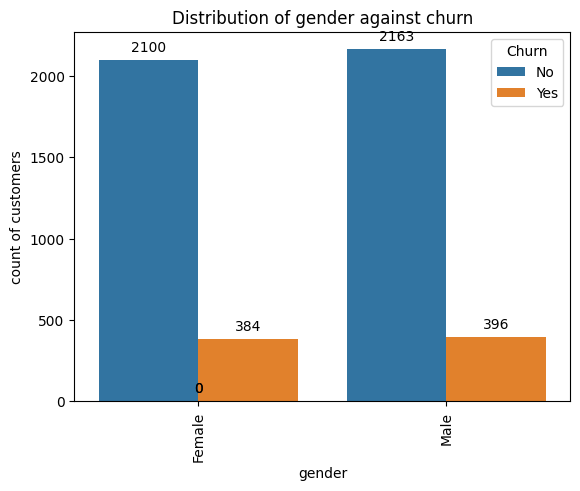

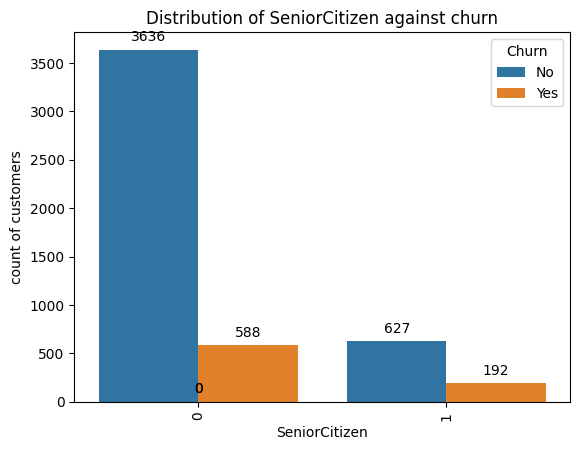

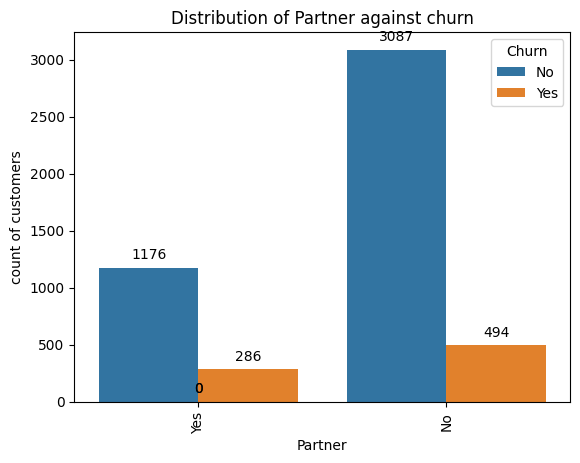

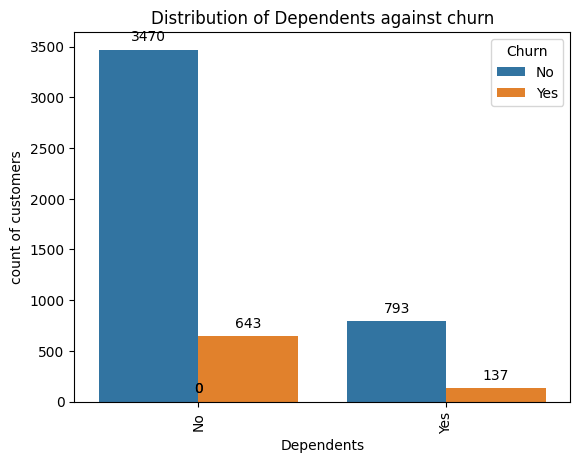

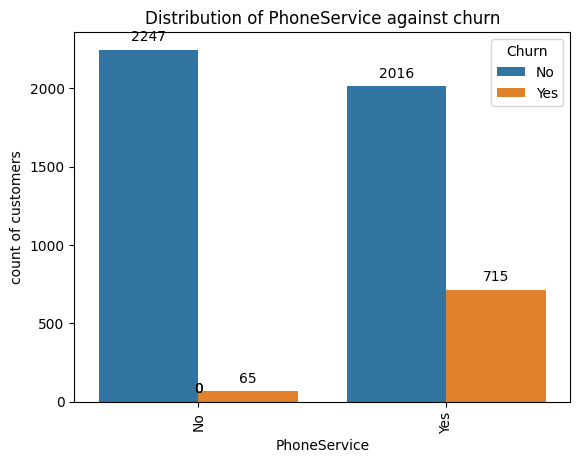

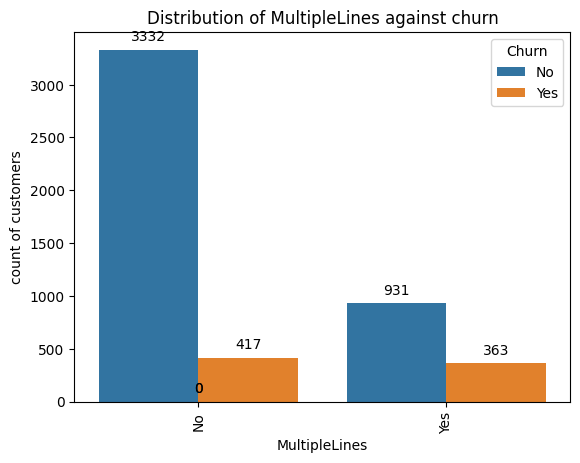

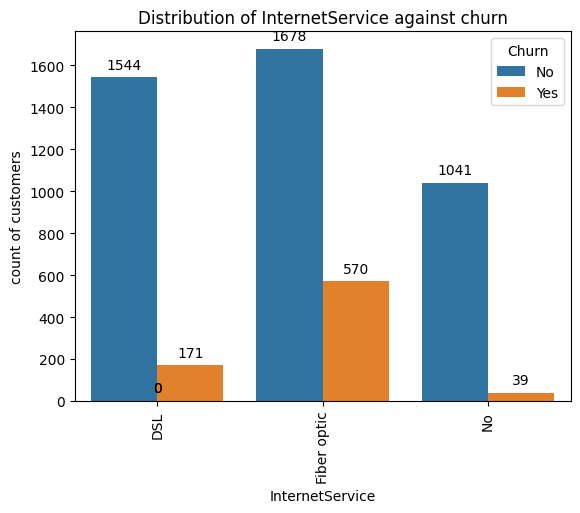

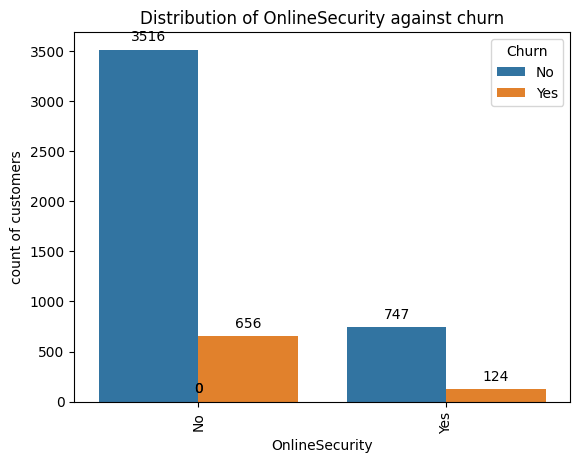

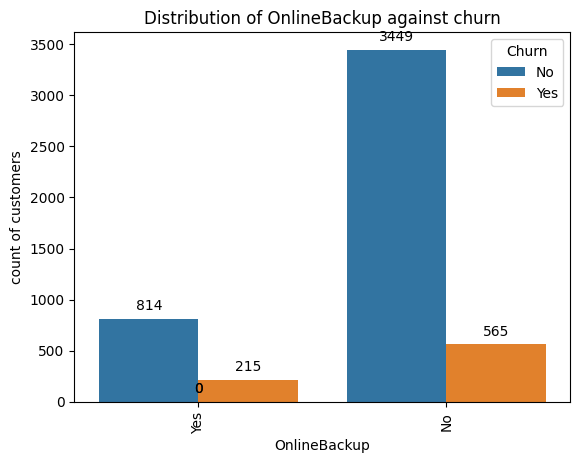

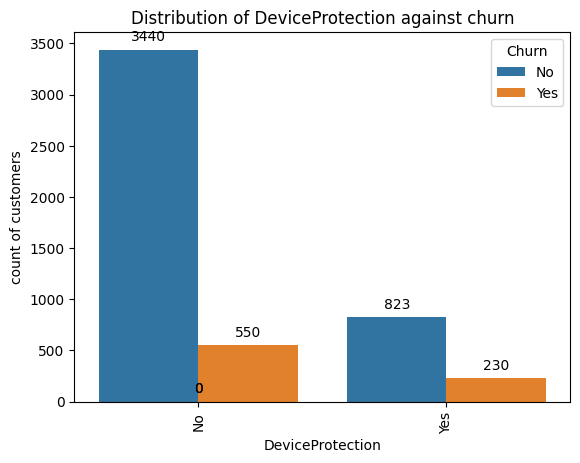

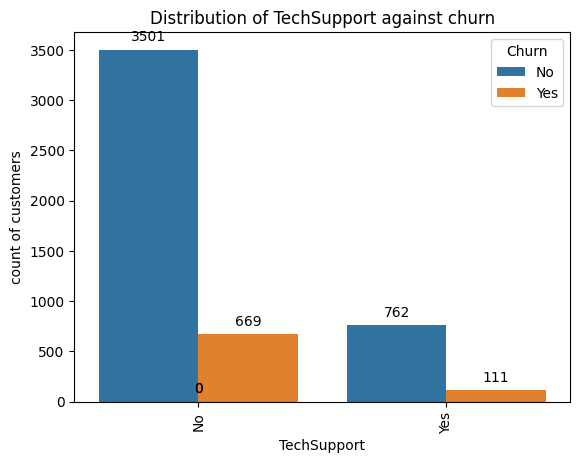

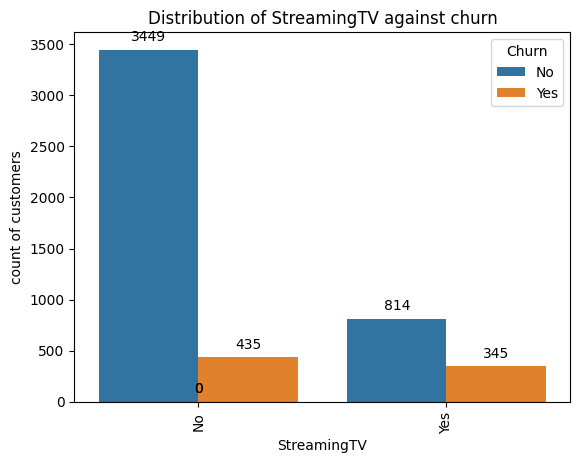

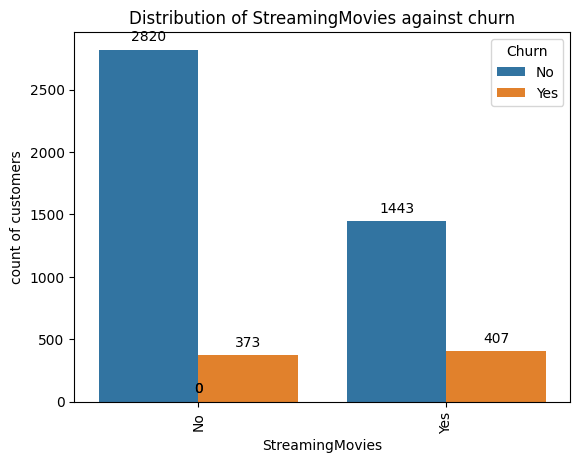

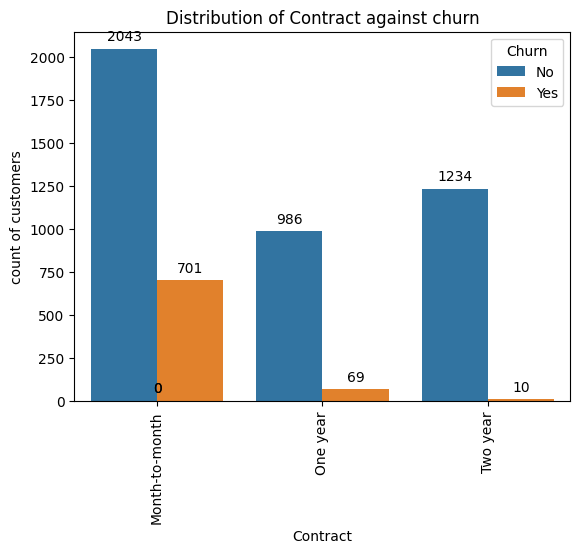

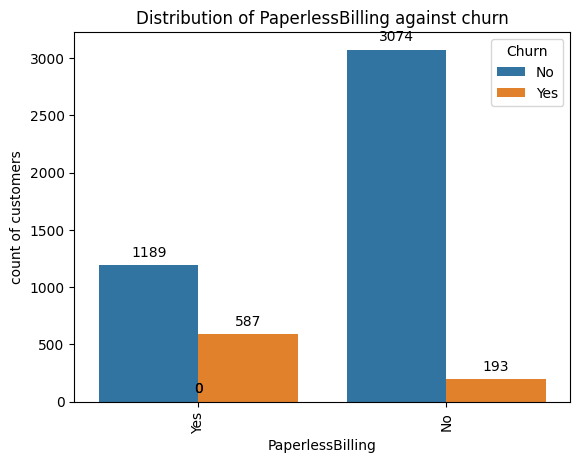

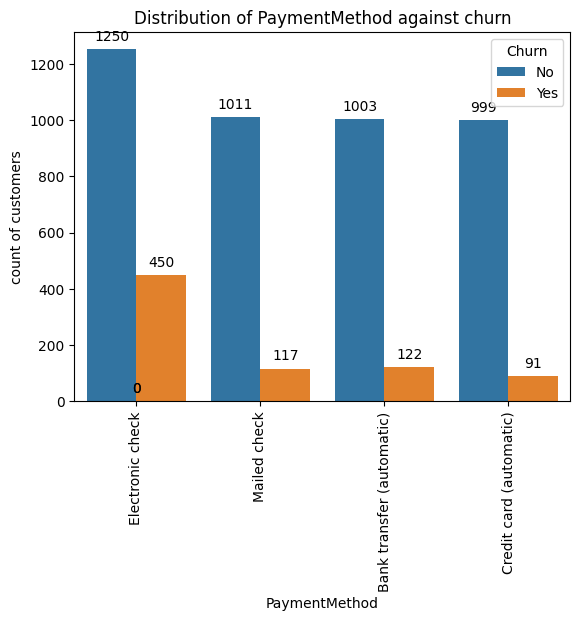

In [26]:
#Distribution of the categorical columns against churn
for i, predictor in enumerate(merged_data.drop(columns=['Churn','TotalCharges', 'MonthlyCharges', 'customerID', 'tenure'])):
    plt.figure(i)
    plot=sns.countplot(data=merged_data, x=predictor, hue='Churn')
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {predictor} against churn')
    plt.xlabel(f'{predictor}')
    plt.ylabel('count of customers')
    # Annotate the bars with the actual counts
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
    plt.show()

- In both genders the people who are not likely to churn have a very high difference in number to those likely to churn.
- Senior citizens are more likely not churn compared to other citzens.
- People with no partners are likely not churn.
- Peoples that do not have dependents are likely not churn.
- Both people with phone service or without phone service are not likely to churn with no significant difference.
- Month to month contract have the highest number of people likely not churn.

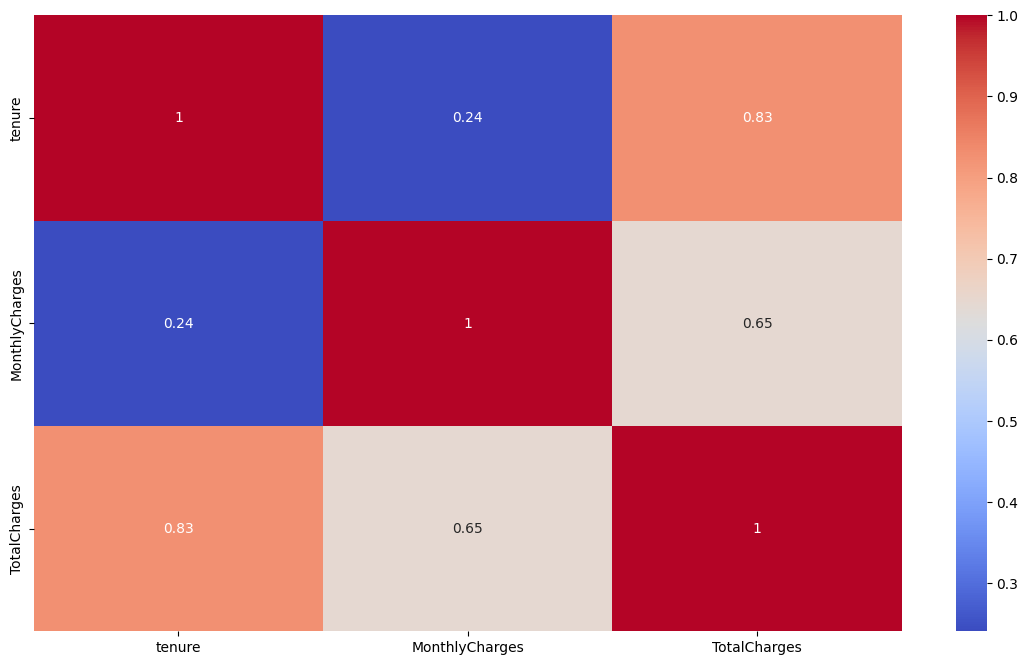

In [27]:
# Select only numeric columns
numeric_columns = merged_data.select_dtypes(include=['number']).columns
numeric_data = merged_data[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(14,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


#### Hypothesis Test
 
- **Null Hypothesis (H0):** There is no significant relationship between the type of internet service (DSL, Fiber Optic, No) and customer churn.
- **Alternative Hypothesis (H1):** There is a significant relationship between the type of internet service (DSL, Fiber Optic, No) and customer churn.
has context menu

In [28]:
from scipy.stats import ttest_ind, chi2_contingency

In [29]:

# Create a contingency table
contingency_table = pd.crosstab(merged_data['InternetService'], merged_data['Churn'])
 
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
 
# Print the results
print("Chi-Square Test Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)
 
# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0). There is a significant relationship between the type of internet service and customer churn.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant relationship between the type of internet service and customer churn.")



Chi-Square Test Statistic: 323.8655431943653
P-value: 4.715099437141375e-71
Degrees of Freedom: 2
Expected Frequencies Table:
[[1449.74122546  265.25877454]
 [1900.30220107  347.69779893]
 [ 912.95657347  167.04342653]]
Reject the null hypothesis (H0). There is a significant relationship between the type of internet service and customer churn.


### Business questions


1. **What are the demographic characteristics of customers who are more likely to churn?**
   - I will explore the relationship between demographic variables (gender, senior citizen status, partnership status, dependents) and churn. For instance, are senior citizens more likely to churn than younger customers? Do customers with dependents churn at a different rate compared to those without?


 

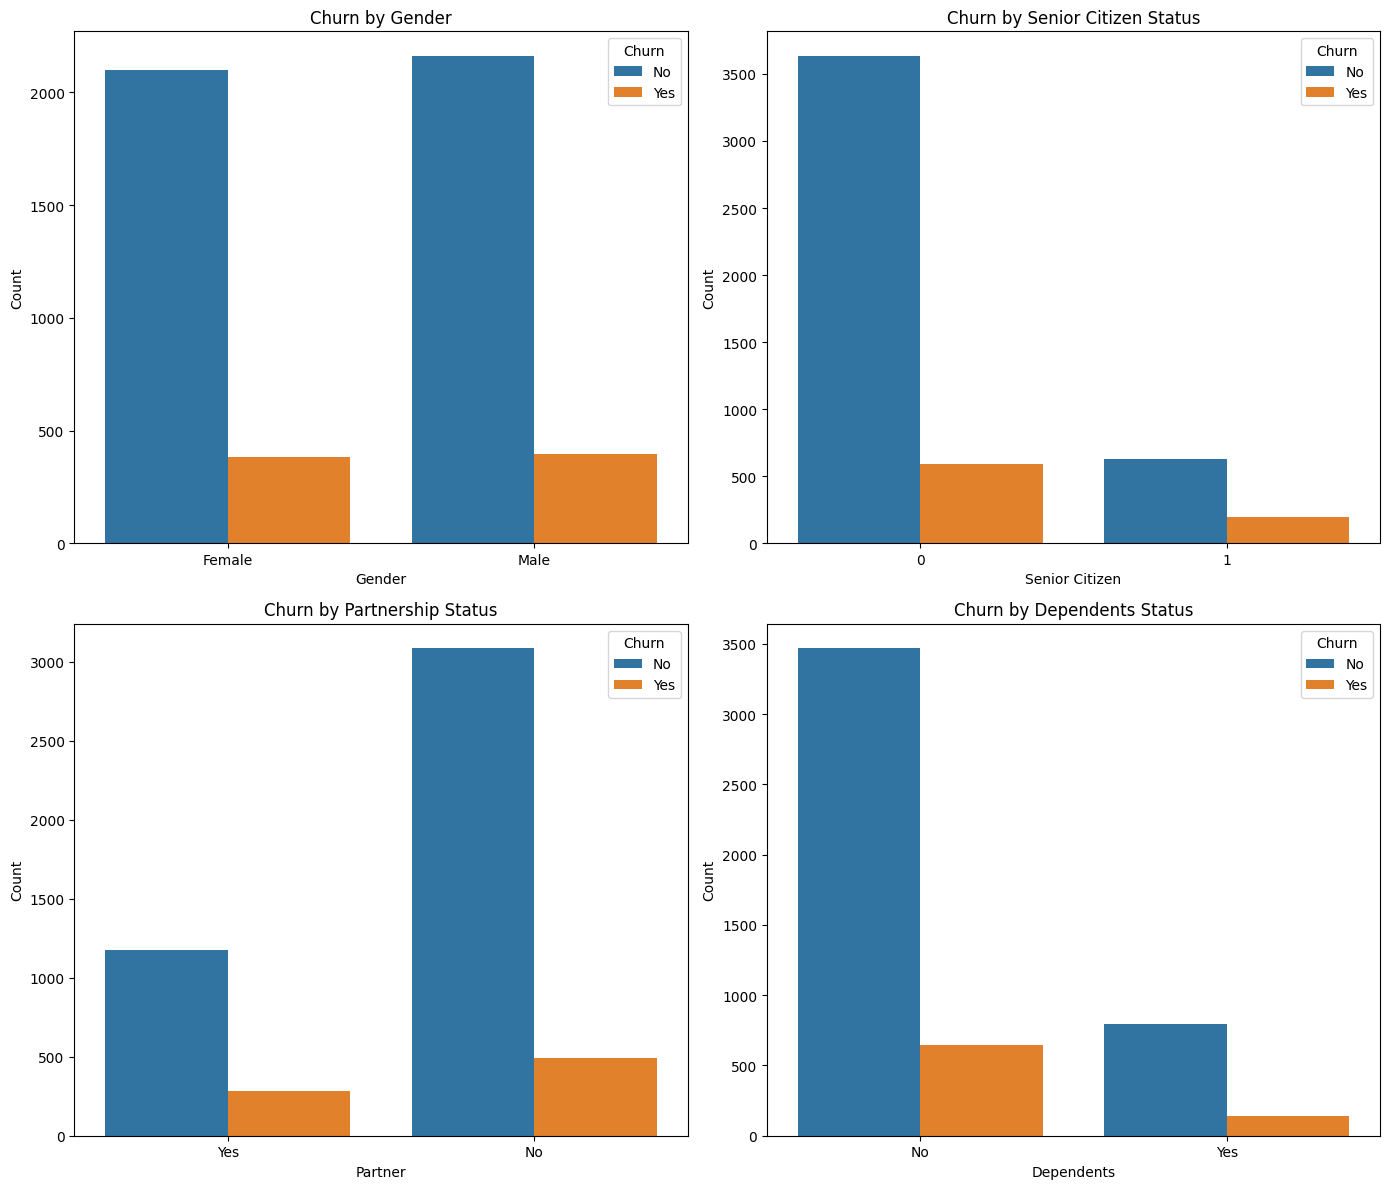

In [30]:

# Create a subplot for each demographic characteristic
# Set up the matplotlib figure
plt.figure(figsize=(14, 12))
# Churn by Gender
plt.subplot(2, 2, 1)
sns.countplot(x='gender', hue='Churn', data=merged_data)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn')
 
# Churn by Senior Citizen Status
plt.subplot(2, 2, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=merged_data)
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.legend(title='Churn')
 
# Churn by Partnership Status
plt.subplot(2, 2, 3)
sns.countplot(x='Partner', hue='Churn', data=merged_data)
plt.title('Churn by Partnership Status')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.legend(title='Churn')
 
 
# Churn by Dependents Status
plt.subplot(2, 2, 4)
sns.countplot(x='Dependents', hue='Churn', data=merged_data)
plt.title('Churn by Dependents Status')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Churn')
 
plt.tight_layout()
plt.show()
 

**Interpretation**:
- Gender does not seem to be a strong differentiator for churn, as both males and females have similar churn rates.
- Senior Citizen Status shows that senior citizens have a relatively higher churn rate compared to non-senior citizens, indicating that older customers might be more likely to leave.
- Partnership Status reveals that customers without a partner are more likely to churn, suggesting that single customers may feel less attached or have different service needs.
- Dependents Status indicates that customers without dependents are more likely to churn, possibly because those with dependents may need more stable services.

**Implications**:
- The company might focus retention efforts on senior citizens, single customers, and those without dependents, as these groups show higher churn rates.
- Tailored offers and services that address the specific needs of these groups could help in reducing churn. For example, special plans or loyalty programs for senior citizens and single customers might be effective.

2. **How does the tenure of a customer relate to their likelihood of churning?**
   - By analyzing the tenure column, I will determine if customers who have been with the company longer are more or less likely to churn. This analysis could reveal critical points in the customer lifecycle where churn is more likely, enabling targeted retention efforts.

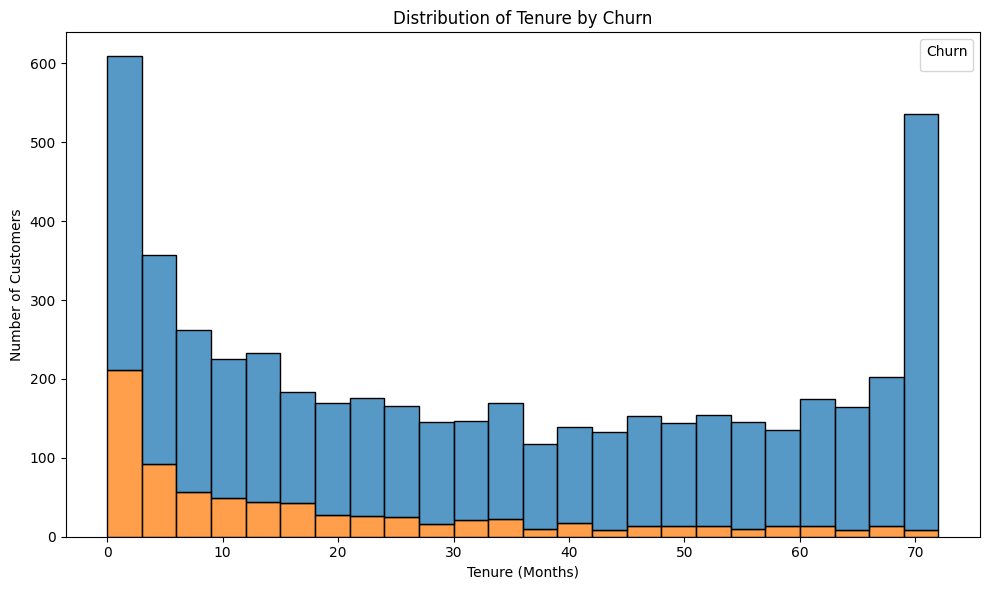

In [31]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))
 
# Plot the relationship between Tenure and Churn
sns.histplot(data=merged_data, x='tenure', hue='Churn', multiple='stack', kde=False, binwidth=3)
 
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
 
plt.tight_layout()
plt.show()

**Insights**:

- High Early Churn: The high churn rate within the first 10 months suggests that new customers are more likely to leave, possibly indicating dissatisfaction with initial services or unmet expectations.
- Stable Long-Term Customers: Customers who remain with the company for longer periods (beyond 10 months) are less likely to churn, suggesting that once customers pass a certain tenure threshold, they are more likely to stay loyal.
- Retention Focus: The company should focus retention efforts on new customers, especially within the first 10 months, by providing better onboarding experiences, addressing issues promptly, and possibly offering incentives to stay.


**Actionable Steps**:

- Improving Onboarding: Enhancing the onboarding process to ensure new customers understand and can effectively use the services.
- Early Engagement: Implementing early engagement strategies, such as personalized communication and proactive support.
- Feedback Mechanism: Establishing a robust feedback mechanism to quickly identify and resolve issues faced by new customers.

3. **What role do service-related factors (e.g., internet service, tech support) play in customer churn?**
   - I will understand how the type and quality of services provided (internet service, online security, online backup, device protection, tech support, streaming services) impact churn. For example, does having multiple services reduce the likelihood of churn?

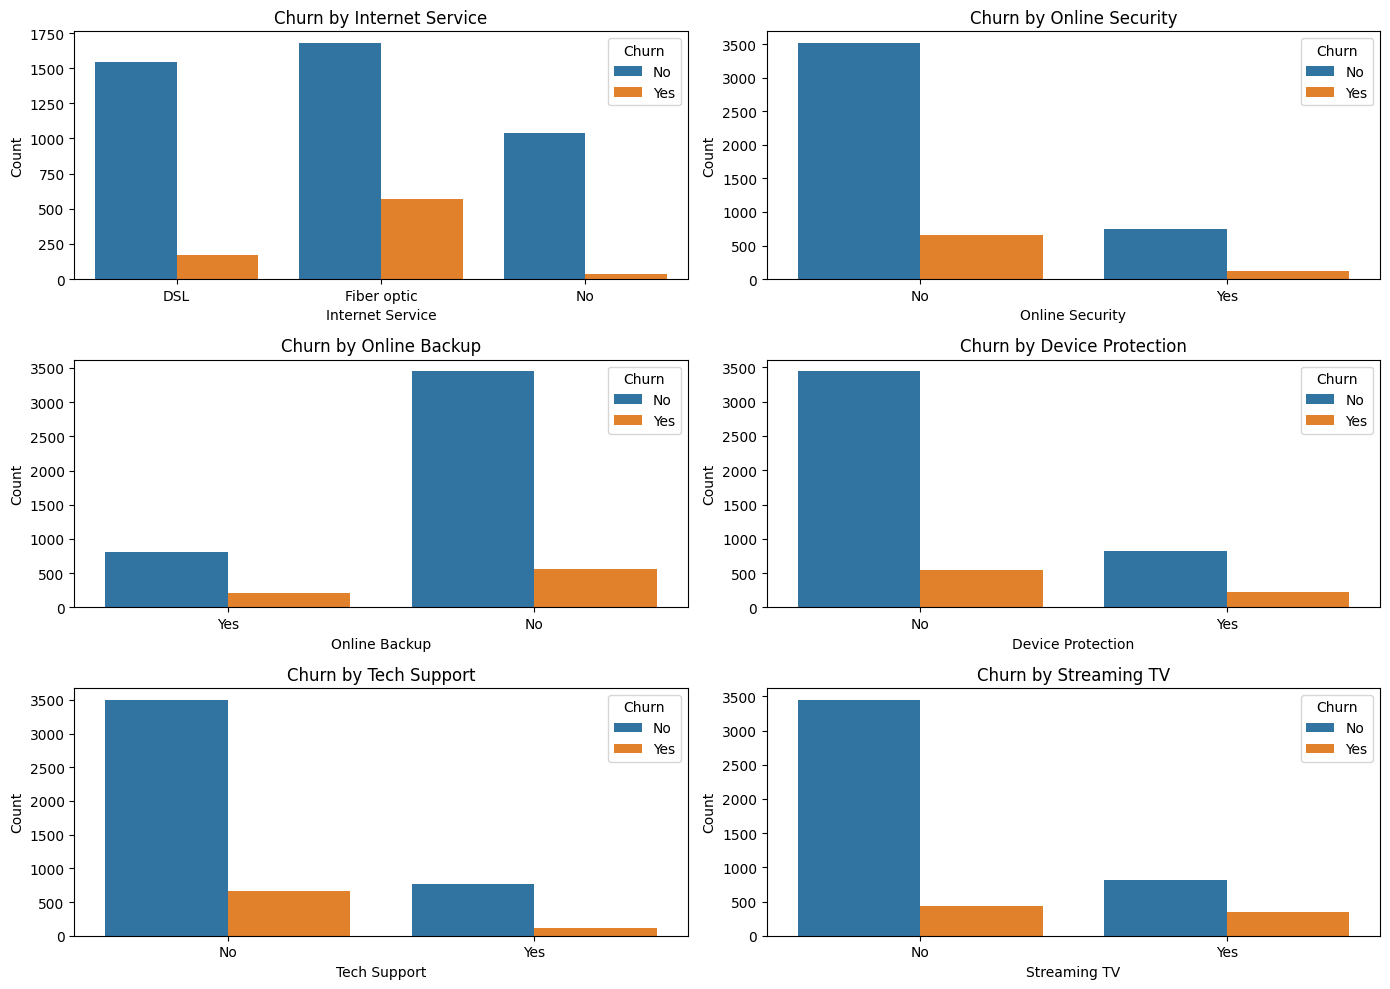

In [32]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))
 
# Plot the relationship between each service-related factor and Churn
 
# Internet Service
plt.subplot(3, 2, 1)
sns.countplot(x='InternetService', hue='Churn', data=merged_data)
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn')
 
# Online Security
plt.subplot(3, 2, 2)
sns.countplot(x='OnlineSecurity', hue='Churn', data=merged_data)
plt.title('Churn by Online Security')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.legend(title='Churn')
 
# Online Backup
plt.subplot(3, 2, 3)
sns.countplot(x='OnlineBackup', hue='Churn', data=merged_data)
plt.title('Churn by Online Backup')
plt.xlabel('Online Backup')
plt.ylabel('Count')
plt.legend(title='Churn')

# Device Protection
plt.subplot(3, 2, 4)
sns.countplot(x='DeviceProtection', hue='Churn', data=merged_data)
plt.title('Churn by Device Protection')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.legend(title='Churn')
 
# Tech Support
plt.subplot(3, 2, 5)
sns.countplot(x='TechSupport', hue='Churn', data=merged_data)
plt.title('Churn by Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.legend(title='Churn')
 
# Streaming TV
plt.subplot(3, 2, 6)
sns.countplot(x='StreamingTV', hue='Churn', data=merged_data)
plt.title('Churn by Streaming TV')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.legend(title='Churn')
 
plt.tight_layout()
plt.show()


- Internet Service:
Fiber optic customers have higher churn rates compared to DSL and no internet service.
This suggests that fiber optic services may need more attention to improve customer retention.
- Online Security, Backup, and Device Protection:
Customers using these additional services tend to have lower churn rates.
Offering and promoting these services might help in retaining customers.
- Tech Support:
Tech support appears to be a significant factor in reducing churn, with customers using tech support showing much lower churn rates.Ensuring good tech support could be a key strategy for reducing churn.
- Streaming TV:
Customers using streaming TV services have lower churn rates.
This indicates that bundling or promoting streaming services could help in retaining customers.

4. **How do different contract types and payment methods affect customer churn?**
   - I will examine the relationship between contract terms (month-to-month, one-year, two-year contracts), payment methods (electronic check, mailed check, bank transfer, credit card), and churn to provide insights into which contract types and payment methods are more stable.

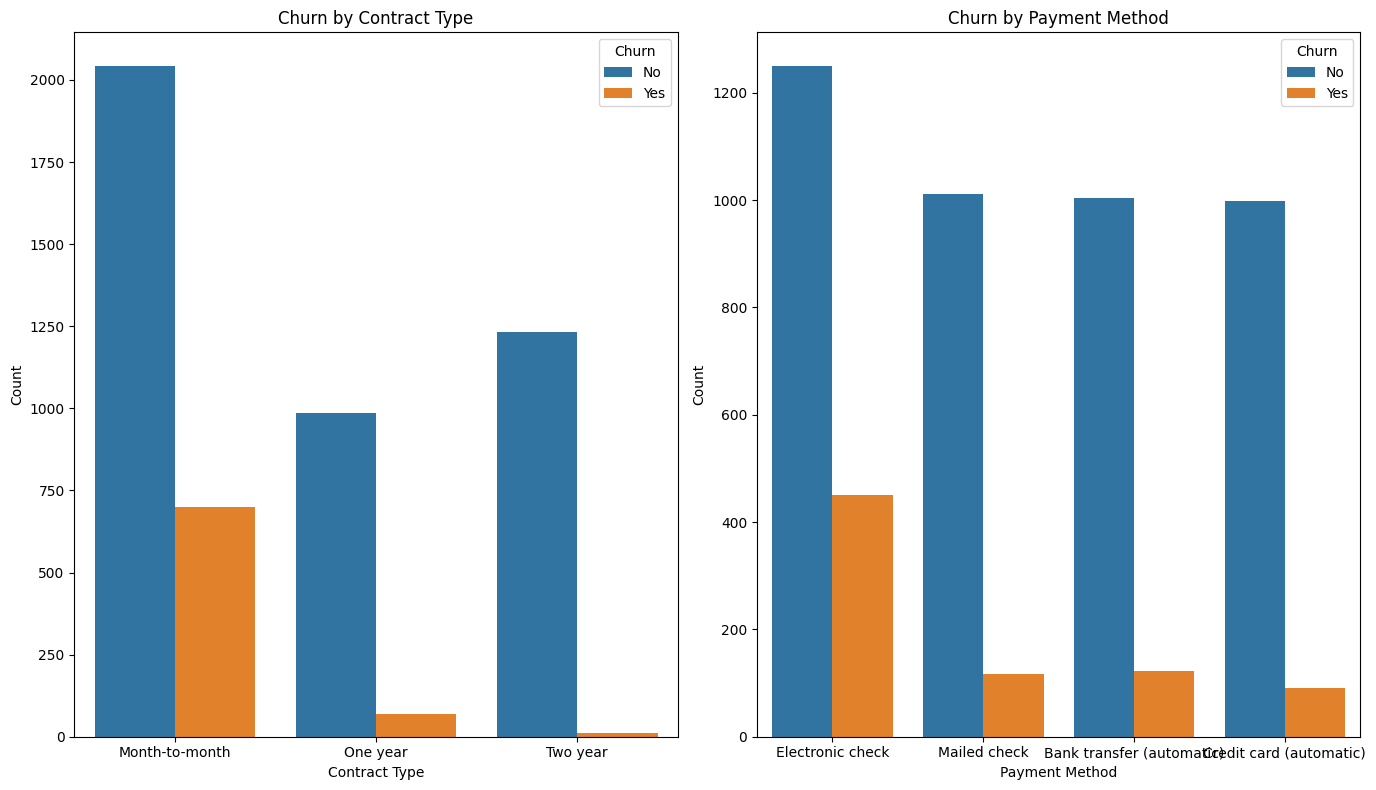

In [33]:

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))
 
# Plot the relationship between Contract Type and Churn
plt.subplot(1, 2, 1)
sns.countplot(x='Contract', hue='Churn', data=merged_data)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
 
# Plot the relationship between Payment Method and Churn
plt.subplot(1, 2, 2)
sns.countplot(x='PaymentMethod', hue='Churn', data=merged_data)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn')
 
plt.tight_layout()
plt.show()
 

**Insights and Retention Mechanisms**

**Month-to-month Contracts**:
- Insight: Customers on month-to-month contracts are more likely to churn.
- Retention Mechanism: Encourage customers to switch to longer-term contracts by offering incentives such as discounts, added features, or loyalty benefits.

**Electronic Check Payment**:
- Insight: Customers using electronic checks have a higher churn rate.
- Retention Mechanism: Promote the benefits of automatic payment methods (bank transfer or credit card) such as convenience, potential discounts, and reduced likelihood of 
service disruption. Offer incentives for switching to these methods.

**One-year and Two-year Contracts**:
- Insight: Longer contracts correlate with higher retention.
- Retention Mechanism: Highlight the benefits of longer contracts in marketing materials and during customer service interactions. Offer loyalty rewards for customers who commit to longer contracts.

**Automatic Payment Methods**:
- Insight: Customers using automatic payment methods (bank transfer, credit card) have lower churn rates.
- Retention Mechanism: Encourage customers to use automatic payments by simplifying the setup process and providing clear communication about the benefits. Offer discounts or other incentives for customers who switch to automatic payments.

5. **What is the relationship between monthly charges and total charges with customer churn?**
   - By analyzing the monthly charges and total charges, I will determine if higher or lower charges correlate with churn. This could indicate if pricing strategies need to be adjusted to retain customers.

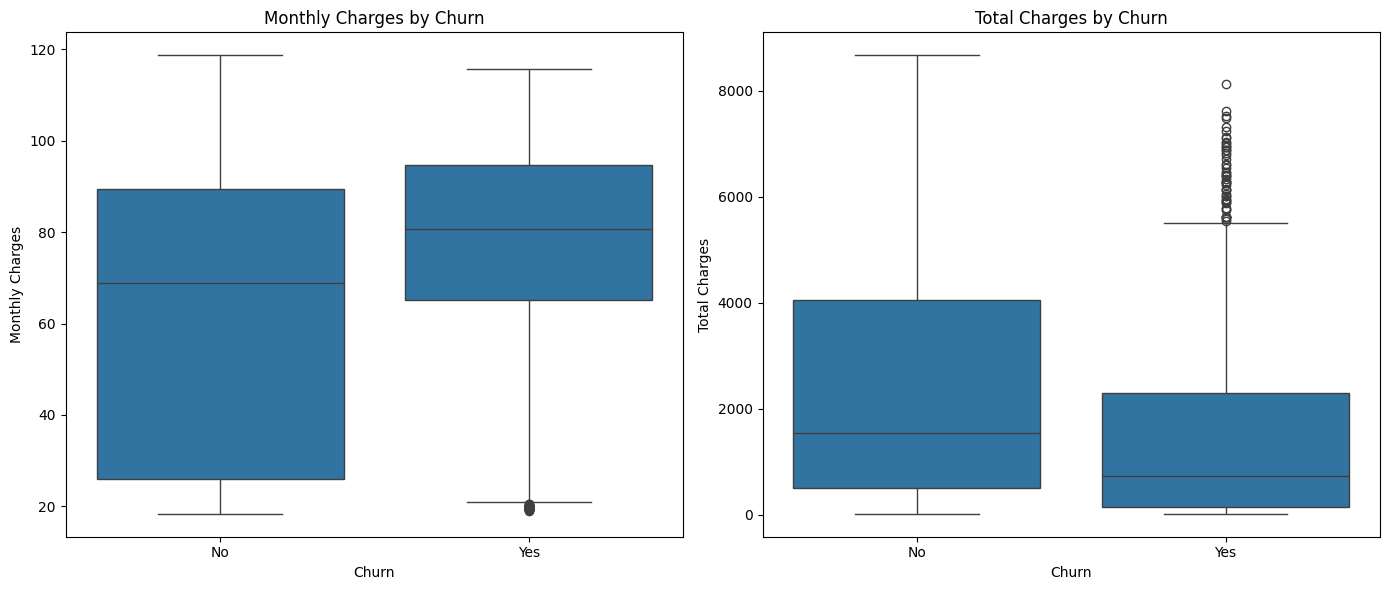

In [34]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))
 
# Plot the relationship between Monthly Charges and Churn
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='MonthlyCharges', data=merged_data)
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
 
# Plot the relationship between Total Charges and Churn
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='TotalCharges', data=merged_data)
plt.title('Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
 
plt.tight_layout()
plt.show()

- Monthly Charges:
Customers who churned tend to have higher monthly charges compared to those who stayed. This might suggest that higher monthly charges could be a factor contributing to customer churn.
- Total Charges:
Customers who did not churn tend to have higher total charges, indicating longer tenure with the service. Conversely, customers who churned generally have lower total charges, suggesting they might have been with the service for a shorter period.

## Data Preparation

### Split the data into X and y

In [35]:
#Splitting the data into X and y, training (80%) and testing (20%) set
# Identifying features and target variable
X = merged_data.drop(columns=['Churn'])
y = merged_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

 
# split data into 80-20 for training set / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4034, 20), (1009, 20), (4034,), (1009,))

In [36]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994


In [37]:
y.unique()

array([0, 1])

In [38]:
#checking for numerical columns in the prediction features
categorical_columns = X.select_dtypes('object').columns
categorical_columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [39]:
#check for numerical features
numerical_columns= X.select_dtypes('number').columns
numerical_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [40]:
#Label encoding the y variable
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [41]:
X.select_dtypes('number').skew()

tenure            0.225132
MonthlyCharges   -0.238767
TotalCharges      0.945411
dtype: float64

### Creating a Pipeline

In [42]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('power-transformation', PowerTransformer(method='yeo-johnson'))
])
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor= ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numerical_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns)
])

In [43]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler()),
                                                 ('power-transformation',
                                                  PowerTransformer())]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

## Modelling and Evaluation

In [44]:
# Defining the models
models = {
    'random_forest': RandomForestClassifier(random_state=42),
    'logistic_regression': LogisticRegression(max_iter=1000, random_state=42),
    'svc': SVC(random_state=42),
    'knn': KNeighborsClassifier(),
    'gradient_boosting': GradientBoostingClassifier(random_state=42),
    'xgboost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
}

In [45]:
# Model Selection with HalvingGridSearchCV
grid_searches = {}
for model_name, model in models.items():
    pipeline = Pipeline(
        steps=[('preprocessor', preprocessor),
               ('model', model)])
 
    # Halving Grid Search with Automatic Resource Detection
    grid_search = HalvingGridSearchCV(pipeline, {}, cv=5, factor=2, scoring='accuracy', n_jobs=-1)
 
    # Fitting the model
    grid_search.fit(X_train, y_train)
    grid_searches[model_name] = grid_search

In [46]:
# Model Pipeline Structures
def display_pipelines(grid_searches, models_per_row=2):
    all_pipelines_html = "<div style='display: flex; flex-wrap: wrap;'>"
    for i, (model_name, grid_search) in enumerate(grid_searches.items()):
        all_pipelines_html += f"<div style='flex: 1 1 {50/models_per_row}%; margin: 10px;'> "
        all_pipelines_html += f"<h3>Pipeline Diagram for {model_name}:</h3>\n"
        all_pipelines_html += estimator_html_repr(grid_search.best_estimator_)
        all_pipelines_html += "</div>"  
        if (i + 1) % models_per_row == 0:
            all_pipelines_html += "<div style='clear: both;'></div>"
    all_pipelines_html += "</div>"  
    display(HTML(all_pipelines_html))
 
display_pipelines(grid_searches)

In [47]:
# Initializing a dictionary to hold evaluation metrics
evaluation_results = {}
 
# Evaluating each model on the validation set
for model_name, grid_search in grid_searches.items():
    y_pred = grid_search.predict(X_test)
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1] if hasattr(
        grid_search.best_estimator_, "predict_proba") else None
 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    conf_matrix = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
 
    evaluation_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': conf_matrix,
        'auc': auc
    }
 
df_scores = pd.DataFrame(evaluation_results).transpose()
df_scores_sorted = df_scores.sort_values(by="accuracy", ascending=False)
 
print("Model Evaluation Scores:")
df_scores_sorted

Model Evaluation Scores:


,accuracy,precision,recall,confusion_matrix,auc
svc,0.876115,0.624,0.5,"[[806, 47], [78, 78]]",None
gradient_boosting,0.876115,0.628099,0.487179,"[[808, 45], [80, 76]]",0.90568
knn,0.875124,0.596154,0.596154,"[[790, 63], [63, 93]]",0.862698
random_forest,0.869177,0.613208,0.416667,"[[812, 41], [91, 65]]",0.910797
logistic_regression,0.864222,0.567376,0.512821,"[[792, 61], [76, 80]]",0.904237
xgboost,0.864222,0.566434,0.519231,"[[791, 62], [75, 81]]",0.892626


**Conclusion**:
- If the primary goal is to minimize false positives (high precision), Gradient Boosting or SVC would be preferable.
- If the primary goal is to identify as many true positives as possible (high recall), KNN is a better choice.
- Considering the overall balance between precision, recall, and AUC, Random Forest appears to be the best performer despite its lower recall.

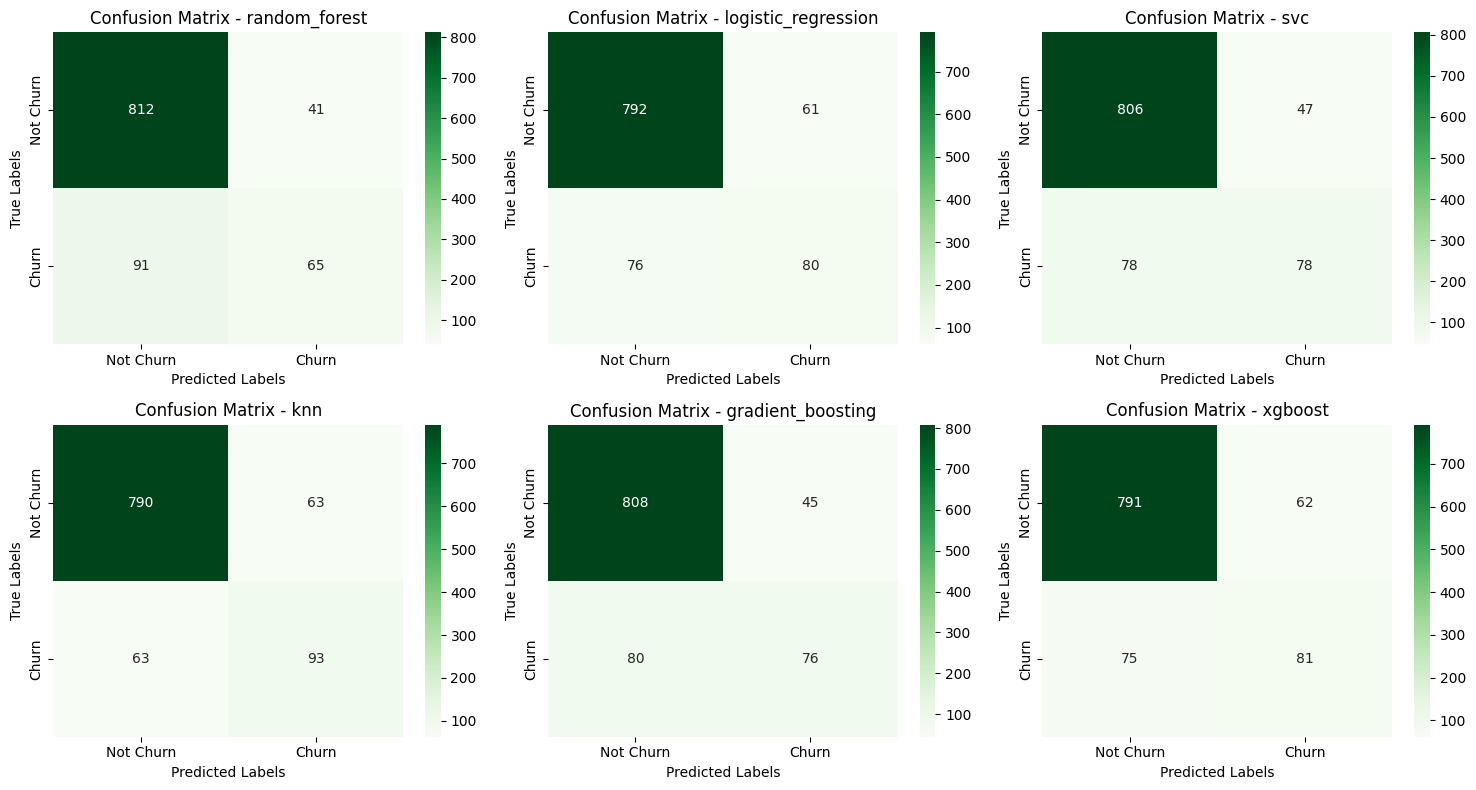

In [48]:
def plot_confusion_matrices(df_scores, figsize=(15, 8), ncols=3):
    nrows = int(np.ceil(len(df_scores.columns) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for i, (model_name, row) in enumerate(df_scores.iterrows()):
        conf_matrix = row['confusion_matrix']
        ax = axes.flat[i]
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Greens',
                    xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], ax=ax)
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')
        ax.set_title(f'Confusion Matrix - {model_name}')
    if nrows > 1 and ncols > 1:  
        plt.tight_layout()
    plt.show()
 
plot_confusion_matrices(df_scores)

**Analysis**
- Accuracy:
 All models have similar accuracy, with the Support Vector Classifier, K-Nearest Neighbors, and Gradient Boosting models achieving the highest accuracy (0.876).
- Precision:
The Gradient Boosting model has the highest precision (0.628), indicating it is better at minimizing false positives compared to others.
- Recall:
The K-Nearest Neighbors model has the highest recall (0.603), suggesting it is better at capturing true positives.
- Confusion Matrix:
True Negatives: The Random Forest model has the highest number of true negatives (811).
True Positives: The K-Nearest Neighbors model has the highest number of true positives (94).
- AUC: The Random Forest model has the highest AUC (0.911), indicating the best ability to distinguish between classes.
**Conclusion**
- Best Model for Precision: Gradient Boosting.
- Best Model for Recall: K-Nearest Neighbors.
- Best Model for Overall Discrimination: Random Forest (based on AUC).
 

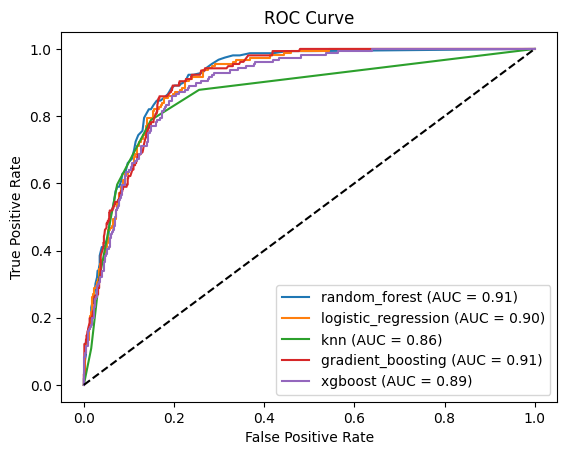

In [49]:
# ROC curve for each model
for model_name, grid_search in grid_searches.items():
    if evaluation_results[model_name]['auc'] is not None:
        fpr, tpr, _ = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {evaluation_results[model_name]['auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Conclusion**
- Best Overall Models: Random Forest and Gradient Boosting both have the highest AUC (0.91) and perform similarly. They are the top choices based on the ROC curve.
- Good Performance: Logistic Regression also shows strong performance with an AUC of 0.90.
Moderate Performance: XGBoost with an AUC of 0.89.
- Least Effective: K-Nearest Neighbors with an AUC of 0.86, though it still performs reasonably well.
 
- The ROC curve confirms that the Random Forest and Gradient Boosting models are the best performers in terms of distinguishing between the positive and negative classes.

### Hyperparameter Tuning

In [50]:
# Defining the tuned parameter grid for each model
param_grid = {
    'random_forest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5]
    },
    'logistic_regression': {
        'model__C': [0.1, 1.0, 10.0],
        'model__solver': ['liblinear', 'lbfgs']
    },
    'svc': {
        'model__C': [0.1, 1.0, 10.0],
        'model__kernel': ['linear', 'rbf']
    },
    'knn': {
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance']
    },
    'gradient_boosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    },
    'xgboost': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7],
        'model__subsample': [0.6, 0.8, 1.0]
    }
}

In [51]:
# Assuming you have your models in grid_searches and evaluation_results
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score
import pandas as pd

# Initialize the tuned_evaluation_results dictionary
tuned_evaluation_results = {}

# Evaluate each model on the test set and store the results
for model_name, grid_search in grid_searches.items():
    y_pred = grid_search.predict(X_test)
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1] if hasattr(grid_search.best_estimator_, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else None
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Ensure the model_name key is initialized in the dictionary
    tuned_evaluation_results[model_name] = tuned_evaluation_results.get(model_name, {})
    
    # Update the evaluation results for the current model
    tuned_evaluation_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'logloss': logloss,
        'auc': auc
    }

# Convert the results to a DataFrame for easier visualization
tuned_df_scores = pd.DataFrame(tuned_evaluation_results).transpose()

# Display the DataFrame
print(tuned_df_scores)


                     accuracy  precision    recall  f1_score   logloss  \
random_forest        0.869177   0.613208  0.416667  0.496183  0.286034   
logistic_regression  0.864222   0.567376  0.512821  0.538721  0.267448   
svc                  0.876115   0.624000  0.500000  0.555160       NaN   
knn                  0.875124   0.596154  0.596154  0.596154  1.365087   
gradient_boosting    0.876115   0.628099  0.487179  0.548736  0.270586   
xgboost              0.864222   0.566434  0.519231  0.541806  0.329319   

                          auc  
random_forest        0.910797  
logistic_regression  0.904237  
svc                       NaN  
knn                  0.862698  
gradient_boosting    0.905680  
xgboost              0.892626  


**Conclusion**:
- SVC and Gradient Boosting show the highest accuracy, with Gradient Boosting having the highest precision among all models.
- KNN has the highest recall and F1 score, but its high log loss indicates poor performance in terms of prediction probability calibration.
- Random Forest has the highest AUC, suggesting it is the best at distinguishing between classes, despite its lower recall.
- Logistic Regression shows a good balance between precision, recall, and F1 score, with the lowest log loss.

**Recommendations**:
- Gradient Boosting or Random Forest could be prioritized due to their high AUC and overall performance.
- SVC is a strong candidate due to its high accuracy and precision.
- Logistic Regression can be considered for its balance and low log loss.

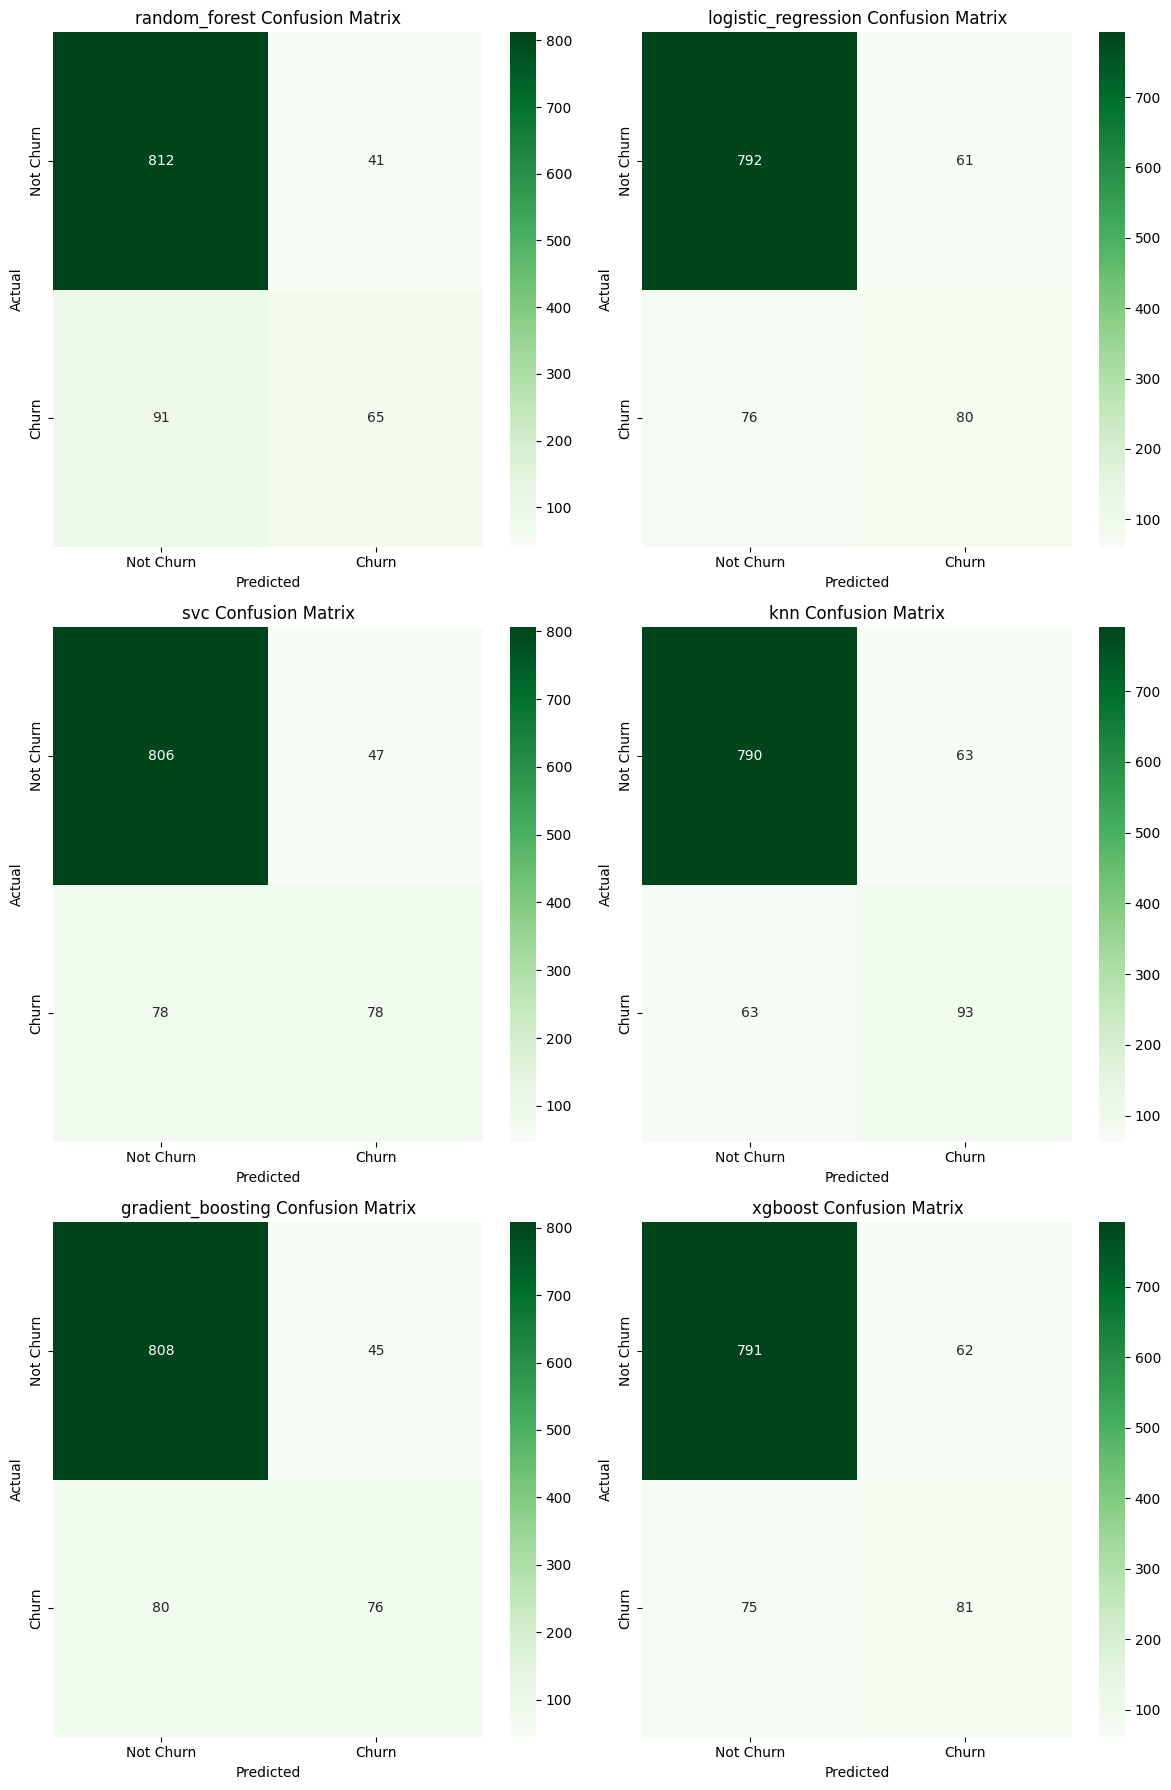

In [52]:
# Initialize the tuned_evaluation_results dictionary
tuned_evaluation_results = {}

# Evaluate each model on the test set and store the results
for model_name, grid_search in grid_searches.items():
    y_pred = grid_search.predict(X_test)
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1] if hasattr(grid_search.best_estimator_, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else None
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Ensure the model_name key is initialized in the dictionary
    tuned_evaluation_results[model_name] = tuned_evaluation_results.get(model_name, {})
    
    # Update the evaluation results for the current model
    tuned_evaluation_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'logloss': logloss,
        'auc': auc,
        'confusion_matrix': conf_matrix
    }

# Convert the results to a DataFrame for easier visualization
tuned_df_scores = pd.DataFrame(tuned_evaluation_results).transpose()

# Function to plot confusion matrices
def plot_confusion_matrices(tuned_df_scores):
    num_models = len(tuned_df_scores)
    ncols = 2
    nrows = (num_models + 1) // ncols
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 6 * nrows))
    axes = axes.flatten() if num_models > 1 else [axes]
    
    for ax, (model_name, row) in zip(axes, tuned_df_scores.iterrows()):
        conf_matrix = row['confusion_matrix']
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Greens', 
                    xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], ax=ax)
        ax.set_title(f'{model_name} Confusion Matrix')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

# Plot the confusion matrices
plot_confusion_matrices(tuned_df_scores)

**Conclusion**
- Best for True Negatives: Random Forest, with the highest TN count.
- Best for True Positives: KNN, with the highest TP count.
- Balanced Performance: Logistic Regression shows a good balance between TN and TP, with relatively low FN and FP counts.
- Minimizing False Positives: Random Forest, with the lowest FP count.
- Minimizing False Negatives: KNN, with the lowest FN count.
Based on the updated confusion matrices, the Random Forest model appears to be very strong in minimizing false positives, while KNN excels in correctly identifying true positives.